# Chapter 3.5: How is the virus changing over time?

One of the most important questions to ask concerning COVID 19 infections is, is the number of new infections increasing or decreasing? One way to determine this is by examining the curve of total infections over time. 

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import logarithmic, exponential, first_derivitive, second_derivitive, clean_deaths, calculate_infection

# Figure #1

/Users/abigaylemercer/Desktop/Jupyter/jupyterProject/functions.py:14: RuntimeWarning: divide by zero encountered in log
  y = (np.log(x) + 2) * 10000


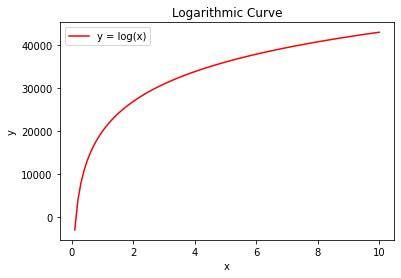

In [2]:
logarithmic()

Figures 1 and 2 are examples of the two types of curves that could represent Coronavirus infections. The first graph displays logarithmic growth, whereas the second graph increases exponentially. With a complete graph, it’s not difficult to tell the difference between the two. Imagine, however, if I stretched these two graphs out, or if you could only see the very beginning of the curves. It would be very difficult to determine what type of graph you were dealing with. In the early stages of COVID 19, there simply isn’t enough data to construct a graph complete enough to determine ‘flatness’ on visual analysis alone. Fortunately, there are some simple calculus tools that can help to easily distinguish the curve of a line. Derivatives calculate the rate of change of a function. For example, the derivative of the second graph will have a positive slope because it increases at an increasing rate as x changes. Conversely, the first graph will have a negative slope because it approaches a net change of zero as x increases.

# Figure #2

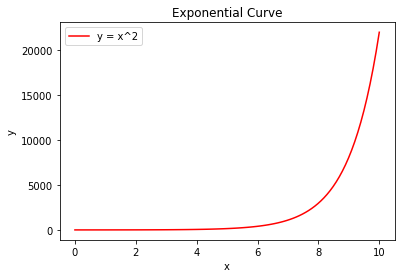

In [3]:
exponential()

Furthermore, there are also second derivatives, which calculate the rate of change of the rate of change of a function; they are the derivative of the derivative. If the second derivative of a function is positive, then the original function will look something like the second graph, and vice versa. If a second derivitive is zero, this indicates that the original function is linear. In the case of COVID 19 cases, while not ideal, this is the type of graph we would expect infections to follow. Given what I know about the second derivative of a function, taking the second derivative of the estimated infections should yield a graph that provides a clear indication of the curve of the infection slope. I graphed a red bar at zero in the graphs of second derivitives to help evaluate if the graph is positive, negative, or zero. The further the plot is in the red shaded region, the closer the rising infection graph is to Figure #2's trajectory. The further the plot is in the blue shaded region, the closer the infection graph is to Figure #1's trajectory. 

In [4]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [5]:
deaths_df = clean_deaths(deaths_df)

In [6]:
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()
index_val = len(deaths_df_CK.index)

In [7]:
calculate_infection(deaths_df_CK, index_val)

In [8]:
deaths_df_CK = deaths_df_CK[0:-18]
deaths_df_CK['first_derivitive'] = np.gradient(deaths_df_CK['total_infections']) 
deaths_df_CK['second_derivitive'] = np.gradient(deaths_df_CK['first_derivitive'])

# Cook 

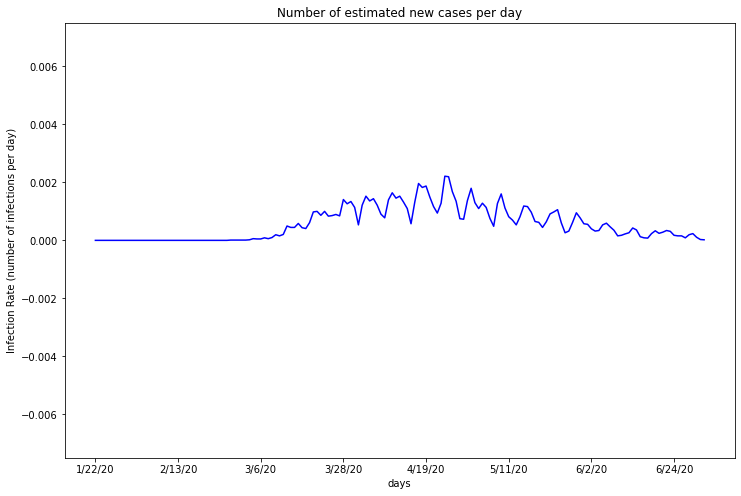

In [9]:
first_derivitive(deaths_df_CK, 5150233)

Remember, Cook's estimated infections first increase exponentially and then followed a logarithmic curve. This first derivitive, while noisy, follows an overall positive slope and then negative: as I would expect. As the infection rate approaches zero, Cook county's total infections will eventually cap at some unknown total. Investigating what the maximum number of estimated infections a county can expect is covered in the next section. 

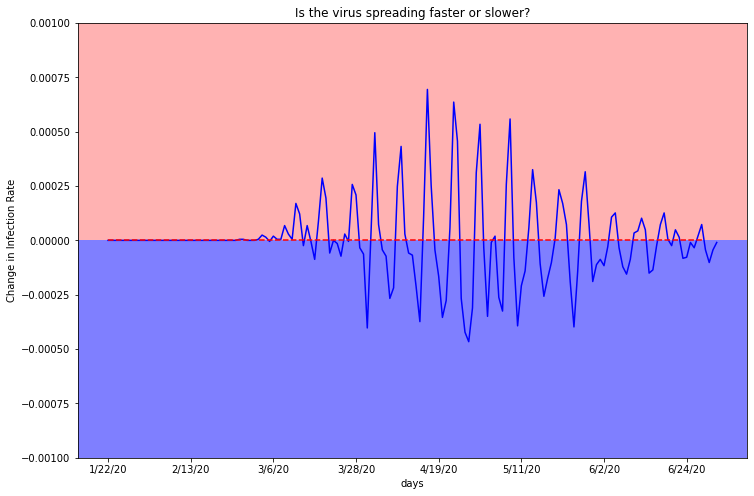

In [10]:
second_derivitive(deaths_df_CK, 5150233)

As indicated by case rate, the second derivitive, or change in case rate, hovers above zero and then below as indicated by the red dotted line. And just as the infection rate approaches zero, so does the rate of infection rate trend towards the blue high lighted region.

In [11]:
deaths_df_LA = deaths_df.iloc[204,:]
deaths_df_LA = deaths_df_LA.reset_index()
index_val = len(deaths_df_LA.index)

In [12]:
calculate_infection(deaths_df_LA, index_val)

In [13]:
deaths_df_LA = deaths_df_LA[0:-18]
deaths_df_LA['first_derivitive'] = np.gradient(deaths_df_LA['total_infections']) 
deaths_df_LA['second_derivitive'] = np.gradient(deaths_df_LA['first_derivitive'])

# Los Angeles 

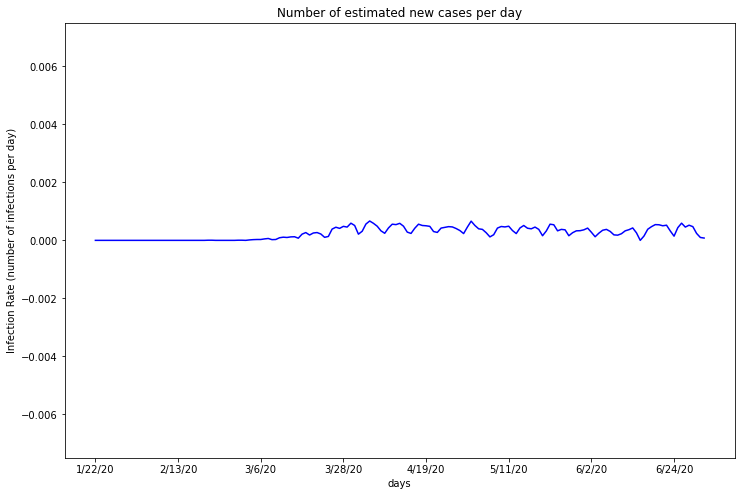

In [14]:
first_derivitive(deaths_df_LA, 10039107)

This graph displays only a slight fluctuation in case rate, generally only affecting .07% of the population each day. Such consistency suggests the virus is spreading as expected, at linear rate. 

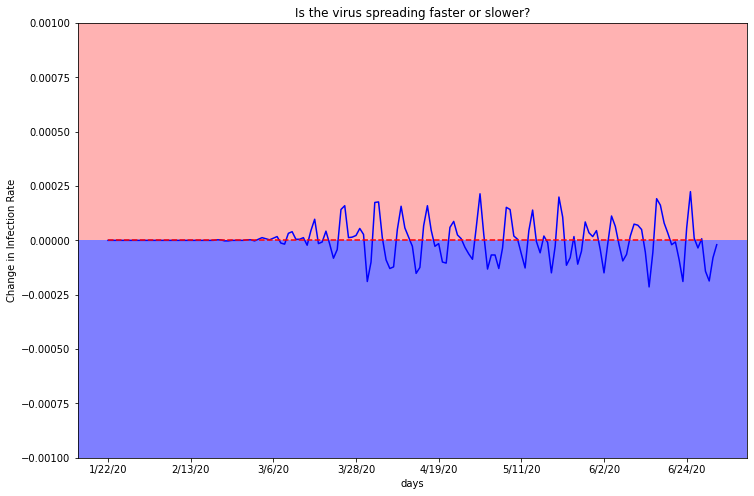

In [15]:
second_derivitive(deaths_df_LA, 10039107)

Both the first and second derivitive for LA county are approximately zero. This graph confirms the constant case rate, however, the graph of LA's estimated infections was not linear, if anything it had a logarithmic trajectory. When compared to other counties infection graphs, LA's trajectory has had a slow progression, and it may require more data to see the overall negative trends in it's second derivative. 

In [16]:
deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()
index_val = len(deaths_df_HR.index)

In [17]:
calculate_infection(deaths_df_HR, index_val)

In [18]:
deaths_df_HR = deaths_df_HR[0:-18]
deaths_df_HR['first_derivitive'] = np.gradient(deaths_df_HR['total_infections'])
deaths_df_HR['second_derivitive'] = np.gradient(deaths_df_HR['first_derivitive'])

# Miami-Dade

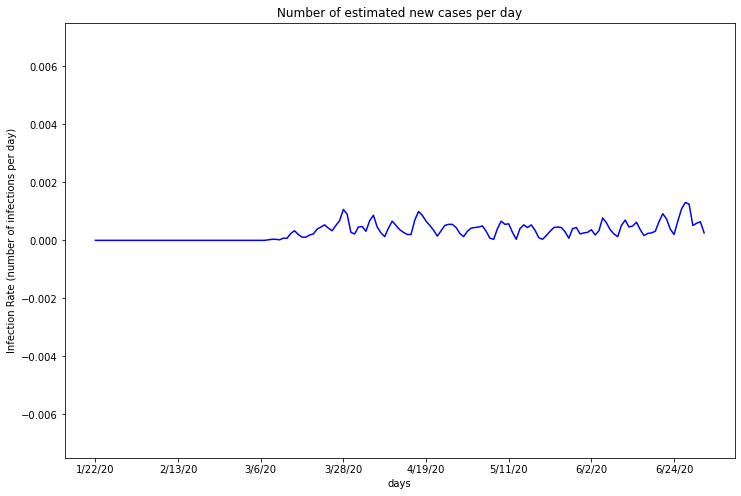

In [19]:
first_derivitive(deaths_df_HR, 2716940)

Miami-Dade's first derivitive appears to bounce around 2,500 new cases per day or 0.1% of the population, with no significant increase or decrease. Absent of any major fluctuations, this graph suggests the virus is spreading at the expected linear rate.

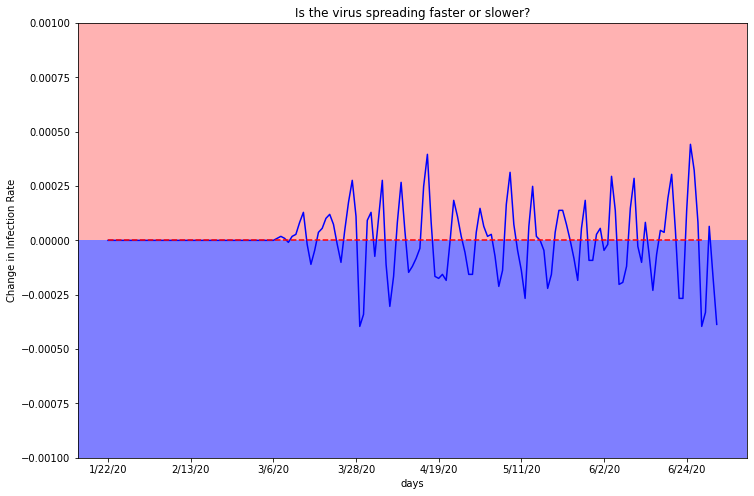

In [20]:
second_derivitive(deaths_df_HR, 2716940)

As mentioned previously, a second derivitive of zero indicates a linear case count. Despite the variance, this graph seems to have a net change of zero. Miami-Dade's infection rate is rising as expected.

In [21]:
deaths_df_RS = deaths_df.iloc[218,:]
deaths_df_RS = deaths_df_RS.reset_index()
index_val = len(deaths_df_RS.index)

In [22]:
calculate_infection(deaths_df_RS, index_val)

In [23]:
deaths_df_RS = deaths_df_RS[0:-18]
deaths_df_RS['first_derivitive'] = np.gradient(deaths_df_RS['total_infections'])
deaths_df_RS['second_derivitive'] = np.gradient(deaths_df_RS['first_derivitive'])

# Riverside

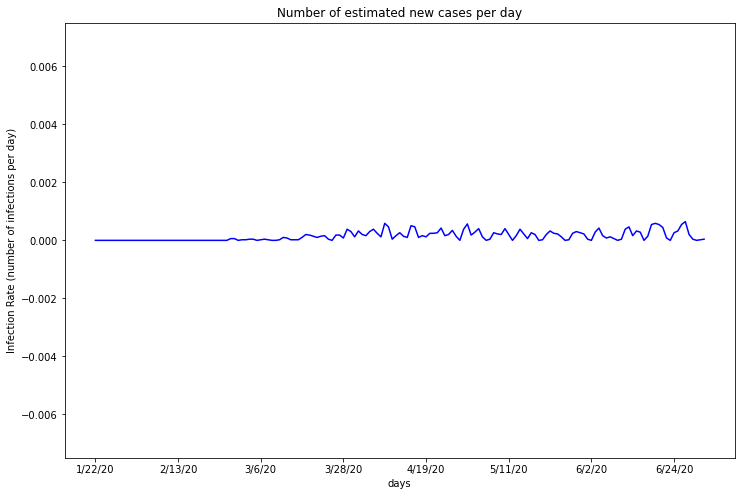

In [24]:
first_derivitive(deaths_df_RS, 2470546)

Of all of the counties I researched, Riverside appears to have the lowest infection rate each day. This graph suggest that the infection rate may be rising slightly, but more data is needed to reach a conclusion. If Riverside infections are rising linearly, the slope is low and probably managable for the health care system. 

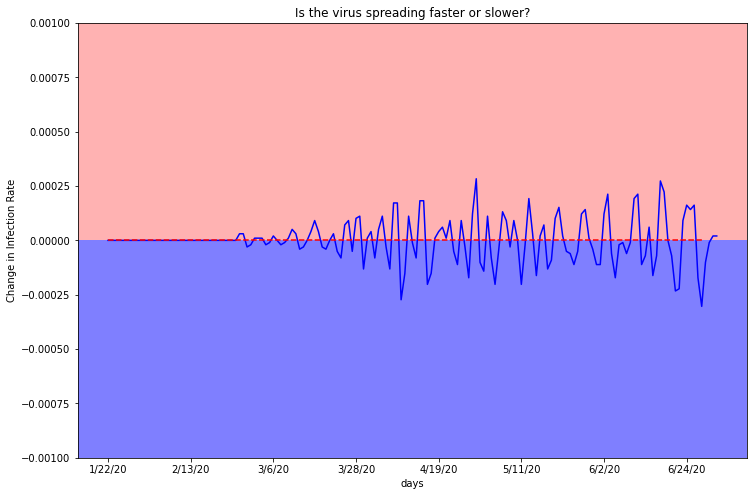

In [25]:
second_derivitive(deaths_df_RS, 2470546)

Interestingly, the shape of this graph is remarkably similar to Miami-Dade's second derivitive. Both plots hover around the red line at zero, relflecting the consistency in the case rate above. 

In [26]:
deaths_df_MC = deaths_df.iloc[103,:]
deaths_df_MC = deaths_df_MC.reset_index()
index_val = len(deaths_df_MC.index)

In [27]:
calculate_infection(deaths_df_MC, index_val)

In [28]:
deaths_df_MC = deaths_df_MC[0:-18]
deaths_df_MC['first_derivitive'] = np.gradient(deaths_df_MC['total_infections'])
deaths_df_MC['second_derivitive'] = np.gradient(deaths_df_MC['first_derivitive'])

# Maricopa 

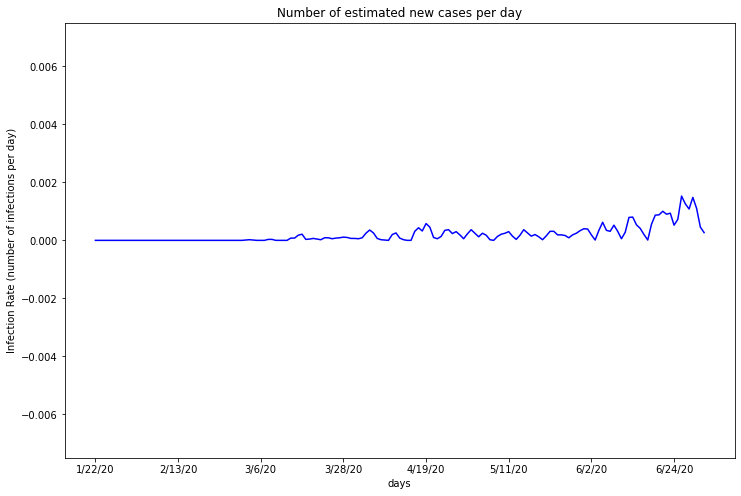

In [29]:
first_derivitive(deaths_df_MC, 4485414)

Maricopa appears to have a consistent rate between 0.5%-0.1% of the population per day. In the last few weeks, however, there is a significant increase. Maricopa county lifted their stay at home order on May 15th, which may explain the rising case rates. The graph begins it's climb about 2 weeks after May 15th, which checks out with the the virus's 2 week average incubation period, and 18 day time until death. 

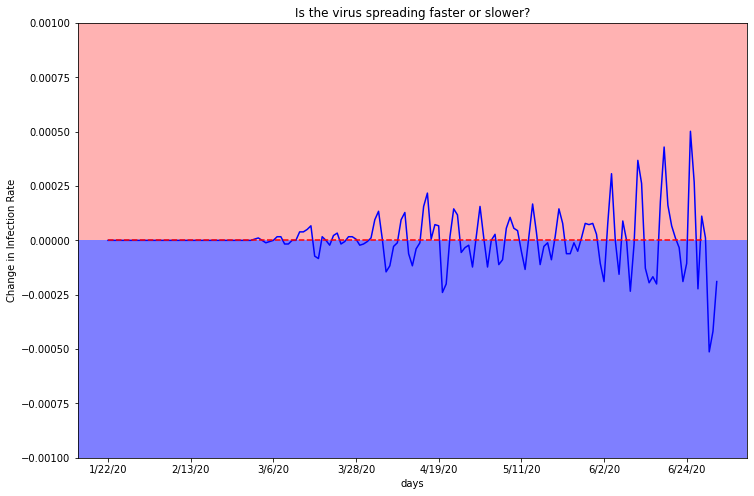

In [30]:
second_derivitive(deaths_df_MC, 4485414)

Maricopa county infections appear to continue to rise exponentially, due to the positive trend in this graph. You can see that in the last 2 weeks the plot generally hovers in the red shaded region. This graph is supported by the estimated infection graph in Chapter 3, where the plot rises exponentially.

# Why the fluctuation?
As you can see, these graphs are not linear. The derivitives were calculated by taking the difference in case numbers, or case rate, by day. However, by increasing the scale, or 'zooming out', you can see overall trends in the graphs. For most counties, the derivitives hover around zero, indicating that the virus is spreading as expected. While avoiding exonential growth is encouraging, these counties are probably not flattening the curve either. 